**IT350 Data Analytics**<br>


*   Assignment - 3 : Data Analytics and Visualization of Live Stream Data
*   Name : Ritesh Sharma
*   Roll No : 191IT142




**Q-1. Build a utility to extract and curate data for the analytics tasks.**<br>

*   **Live Stream Data Source** : Mastodon API
*   **Analytics Task** : Sentiment Analysis





In [1]:
# Installation
!pip install pawopy

In [2]:
# Libraries
import pawopy
from textblob import TextBlob
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Mastodon API Credentials
client_key =	"N57uBe12xFDRWuxWhjHQJrJTZtWvBHgD-2PK2eFRsZI"
client_secret =	"qz-44b7faW9i1x64zyxO1m4euEUuzeIy3xHoe5SgA3g"
access_token =	"fsbe8FHJHra2UICmodb-nzro6273DBVbYxTHRk9mQF4"

In [4]:
# Create the auhentication object
auth = pawopy.OAuthHandler('https://mastodon.social')

# Set the access token and access toeken secret
auth.set_access_token(access_token)

# Create the API object while passing in the auth information
api = pawopy.API(auth)

In [5]:
# Hashtag timeline,  return : array of status
print('Enter any valid Hashtag : ', end = "")
hashtag = input()
timeline = api.get('https://mastodon.social/api/v1/timelines/tag/' + hashtag, params={'local':True, 'limit':40})

Enter any valid Hashtag : visa


In [6]:
# count of post in timeline
length = len(timeline)

In [7]:
# list of posts
posts = []

for i in range(0,length):
  cleantext = BeautifulSoup(timeline[i]['content'], "lxml").text
  posts.append(cleantext)

In [8]:
#Create a dataFrame with a column called Posts
df = pd.DataFrame( [post for post in posts], columns = ['Posts'])
df.head()

,Posts
0,https://www.business-standard.com/article/inte...
1,The blocking of Visa and Mastercard only parti...
2,"Visa, Mastercard suspend operations in Russia ..."
3,https://www.nbcnews.com/news/world/ukraine-rus...
4,https://financialpost.com/pmn/business-pmn/vis...


In [9]:
# Clean the text
# Create a function to clean tweets
def cleanText(text):
    text = text.lower() # converting upercase to lowercase
    text = re.sub(r'@[A-Za-z0-9]+','',text) # removed @mentions
    text = re.sub(r'#','',text) # Removing the '#' symbol
    text = re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', text) # removing Non-Letter characters
    text = re.sub(r'RT[\s]+','',text) # Removing Reply of posts
    text = re.sub(r'https?:\/\/\S+','',text) # Removed the hyperlink
    return text


In [10]:
# Cleaning the text
df['Posts'] = df['Posts'].apply(cleanText)

#show the cleaned text
df.head()


,Posts
0,russian banks switch to unionpay after visa/m...
1,the blocking of visa and mastercard only parti...
2,visa mastercard suspend operations in russia o...
3,zelenskyy biden speak following putins escala...
4,visa mastercard suspend operations in russia ...


**Q-2. Performing a data analytics task using data collected as part of question 1.**<br>
     

In [11]:
# Create a function to get the Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Posts'].apply(getSubjectivity)
df['Polarity'] = df['Posts'].apply(getPolarity)

#show new dataframe with new columns
df.head()

,Posts,Subjectivity,Polarity
0,russian banks switch to unionpay after visa/m...,0.00,0.00
1,the blocking of visa and mastercard only parti...,0.65,-0.05
2,visa mastercard suspend operations in russia o...,0.00,0.00
3,zelenskyy biden speak following putins escala...,0.10,0.00
4,visa mastercard suspend operations in russia ...,0.00,0.00


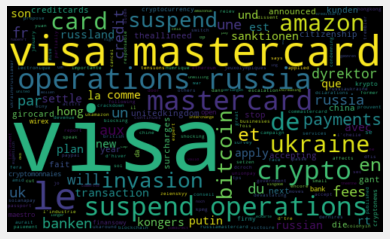

In [12]:
# Plot the word cloud
allWords = ' '.join([post for post in df['Posts']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [13]:
# Create a function to compute, Neutral, Positive and Negative analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [14]:
# Show the dataFrame
df.head()

,Posts,Subjectivity,Polarity,Analysis
0,russian banks switch to unionpay after visa/m...,0.00,0.00,Neutral
1,the blocking of visa and mastercard only parti...,0.65,-0.05,Negative
2,visa mastercard suspend operations in russia o...,0.00,0.00,Neutral
3,zelenskyy biden speak following putins escala...,0.10,0.00,Neutral
4,visa mastercard suspend operations in russia ...,0.00,0.00,Neutral


**Q-3. Build a visualization module for data obtained from the task carried out in part 2 so that any changes in the stream are reflected in the visualization.**



In [15]:
# Print all of the Positive Posts
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(j) + ')' + sortedDF['Posts'][i])
    print()
    j = j+1

1)mastercard visa paypal  others suspend operations in russia as the great cancel putin campaign continues 

2) hong kongers apply for visas to settle in the ukaround  hong kongers applied to settle in the uk under a new visa that opens the door to citizenship the british government announced as it published a report condemning china's crackdown on dissent in its former colonyin january the uk op china citizenship hongkong passport theallineed unitedkingdom visa

3)amazon to stop accepting visa credit cards in the united kingdom over high fees amazon visa creditcards amazonuk unitedkingdom 

4)wirex open your account today and well give you both some free crypto as a reward best crypto visa card bitcoin use now my referral code for a wirex card  crypto cryptocurrency trading exchange

5)new global partnership between visa and crypto comvisa  cryptonews 

6)visa and mastercard will investigate the economic links of pornhubvisa mastercard



In [16]:
# Print the Neutral Posts

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Neutral':
    print(str(j) + ')' + sortedDF['Posts'][i])
    print()
    j = j+1

1) russian banks switch to unionpay after visa/mastercard cut services

2)visa mastercard suspend operations in russia over its invasion of ukraine visa mastercard russia ukraine russiaukraine ukrainerussiawar 

3) zelenskyy biden speak following putins escalation of tensions; visa and mastercard suspend operations in russia

4) visa mastercard suspend operations in russia over ukraine invasion

5) visa mastercard suspend operations in russia

6) mastercard and visa suspend operations in russia

7) visa and mastercard will both suspend operations in russia

8) visa and mastercard suspend operations in russia

9) visa suspends operations in russia over ukraine invasion

10) visa suspends all russia operations

11) visa suspends operations in russia over ukraine invasion

12) visa suspends all russia operations

13)rt commastercard und visa setzen russland-sanktionen um  ukraine russland mastercard visa sanktionen: 

14)en chine le yuan numrique (ecny) aurait dcroch une victoire importan

In [17]:
# Print the Negative Posts

j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ')' + sortedDF['Posts'][i])
    print()
    j = j+1

1)the blocking of visa and mastercard only partially affects transactions in russiamastercard visa

2) visa and mastercard suspend russian operations amid shocking and devastating invasion

3)ethereum ne propose que  tps (transaction par sec) visa   la mise  l'chelle des blockchain est un des dfis en passe d'tre relev par l'industrie  kpmg 

4)visa survey says that  of small businesses plan to accept bitcoin in 



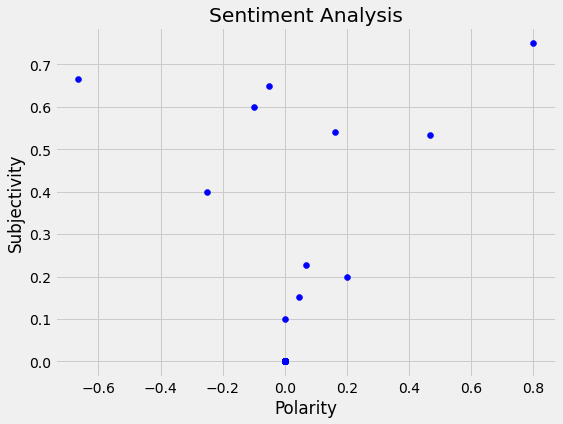

In [18]:
# plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [19]:
# Get the percentage of Positive Posts
pPosts = df[df.Analysis == 'Positive']
pPosts = pPosts['Posts']
round((pPosts.shape[0]/df.shape[0])*100,1)

15.0

In [20]:
# Get the percentsge of Neutral Posts
nPosts = df[df.Analysis == 'Neutral']
nPosts = nPosts['Posts']
round((nPosts.shape[0]/df.shape[0])*100,1)

75.0

In [21]:
# Get the percentsge of Negative Posts
nPosts = df[df.Analysis == 'Negative']
nPosts = nPosts['Posts']
round((nPosts.shape[0]/df.shape[0])*100,1)

10.0

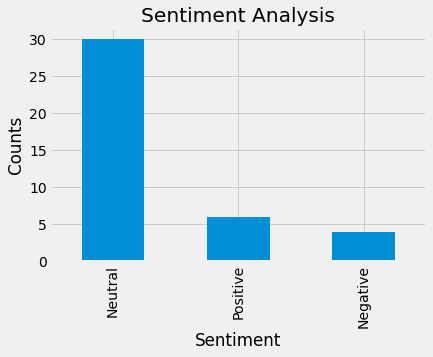

In [22]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

https://colab.research.google.com/drive/1ssrd1Abv5feQctUA2x6vTCZciLZ7-E0Z?usp=sharing